# Bagging and Ensembling with Random Forest

<b> Goals </b>

- Random Forest model: the ins and outs and how it relates to Decision Trees. Our first **black box** model.
- The concept of bagging and ensembling in the context of machine learning and specifically the Random Forest model.
- Compare and contrast Decision Trees with Random Forest using both the regression and classification of each model.

In [ ]:
#black box typically lacks interpretability.. 
#ensemble means together.
#before we build a model, we can do a sudo code below!

## Ensembling


Let's pretend that instead of building a single model to solve a binary classification problem, you created **five independent models**, and each model was correct about 70% of the time. If you combined these models into an "ensemble" and used their majority vote as a prediction, how often would the ensemble be correct? Think wisdom of the crowds.

In [3]:
import numpy as np

# set a seed for reproducibility
np.random.seed(1234)

# generate 1000 random numbers (between 0 and 1) for each model, representing 1000 observations
mod1 = np.random.rand(1000)
mod2 = np.random.rand(1000)
mod3 = np.random.rand(1000)
mod4 = np.random.rand(1000)
mod5 = np.random.rand(1000)

# each model independently predicts 1 (the "correct response") if random number was at least 0.3
preds1 = np.where(mod1 > 0.3, 1, 0)
preds2 = np.where(mod2 > 0.3, 1, 0)
preds3 = np.where(mod3 > 0.3, 1, 0)
preds4 = np.where(mod4 > 0.3, 1, 0)
preds5 = np.where(mod5 > 0.3, 1, 0)

# print the first 20 predictions from each model
print preds1[:20]
print preds2[:20]
print preds3[:20]
print preds4[:20]
print preds5[:20]

[0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1]
[1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0]
[1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1]
[1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0]
[0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1]


In [2]:
# average the predictions and then round to 0 or 1
ensemble_preds = np.round((preds1 + preds2 + preds3 + preds4 + preds5)/5.0).astype(int)

# print the ensemble's first 20 predictions
print ensemble_preds[:20]

[1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


In [3]:
# how accurate was each individual model?
print preds1.mean()
print preds2.mean()
print preds3.mean()
print preds4.mean()
print preds5.mean()

0.713
0.665
0.717
0.712
0.687


In [4]:
# how accurate was the ensemble? significantly higher here, and more accurate. 
#Wisdom of the crowds. As we add more models, the errors decrease

print ensemble_preds.mean()

0.841


**Note:** As you add more models to the voting process, the probability of error decreases, which is known as [Condorcet's Jury Theorem](http://en.wikipedia.org/wiki/Condorcet%27s_jury_theorem).

### What is ensembling?

<br>

**Ensemble learning (or "ensembling")** is the process of combining several predictive models in order to produce a combined model that is more accurate than any individual model. Ensemble models are basically models made up of other models. 

- **Regression:** take the average of the predictions
- **Classification:** take a vote and use the most common prediction, or take the average of the predicted probabilities

For ensembling to work well, the models must have the following characteristics:

- **Accurate:** they outperform the null model
- **Independent:** their predictions are generated using different processes

**The big idea:** If you have a collection of individually imperfect (and independent) models, the "one-off" mistakes made by each model are probably not going to be made by the rest of the models, and thus the mistakes will be discarded when averaging the models.

There are two basic **methods for ensembling:**

- Manually ensemble your individual models
- Use a model that ensembles for you

### Manual Ensembling
![Machine learning flowchart](images/crowdflower_ensembling.jpg)

*Machine learning flowchart created by the [winner](https://github.com/ChenglongChen/Kaggle_CrowdFlower) of Kaggle's [CrowdFlower competition](https://www.kaggle.com/c/crowdflower-search-relevance)*

What makes a good manual ensemble?

- Different types of **models**
- Different combinations of **features**
- Different **tuning parameters**

### Comparing manual ensembling with a single model approach

**Advantages of manual ensembling:**

- Increases predictive accuracy
- Easy to get started

**Disadvantages of manual ensembling:**

- Decreases interpretability
- Takes longer to train
- Takes longer to predict
- More complex to automate and maintain
- Small gains in accuracy may not be worth the added complexity

## Random Forest

As you may have already guessed, Random Forest is related to Decision Trees. Knowing what we know about Decision Trees, what do you think Random Forest does? What is the relationship between a tree and a forest?


- Decision Tree is singular while Random Forest is plural. Instead of one decision, we have multiple, a whole forest of decisions.  
- Each tree in the Random Forest gets a vote on deciding the outcome.
- Random Forest is a type of Ensembling because these sub models are Decision Trees. Random Forest generates many Decision Trees and combines them to generate a single prediction through a voting process.
- Random Forest usually better than Decision Trees because it's not as vulnerable to overfitting. This is why Random Forest has become such a popular algorithm for the data scientists.
- Like Decision Trees, you can set the parameters such as maximum number of features. Random Forest also uses the same attributes to determine the split such as gini and [entropy](http://www.saedsayad.com/decision_tree.htm).
- But perhaps the most significant parameter we have to set is the number of trees or estimators in our model, so we have to "tune" this parameter in order to optimize our model.
- Regression application.


In [ ]:
#usually don't have to set the depth, uses Gini and Entropy, as metrics

## Bagging

Random forest models do not just create a whole bunch of trees from the same data. They use <b>bagging</b> and a random selection of features to generate different trees. If they didn't use this, then the trees would all be very similar if not the same, which would almost eliminate the point of Random Forest.
<br><br>
<b>Bagging:</b>  General purpose procedure for reducing the variance of a machine learning method. Bagging is short for bootstrap aggregation. What is a **bootstrap sample**? A random sample with replacement. 

<br>
Each tree selects a sample of observations/events with replacement to build the training set. Replacement means it chooses the same observation multiple times — only an issue with very small sample datasets. Observation is put "back in the bag" for future use. 

**How does bagging work for Random Forest?**

1. Grow N trees using N bootstrap samples from the training data.
2. Train each tree on its bootstrap sample and make predictions.
3. Combine the predictions:
    - Average the predictions for **regression trees**
    - Take a vote for **classification trees**

Notes:

- **Each bootstrap sample** should be the same size as the original training set.
- **N** should be a large enough value that the error seems to have "stabilized". We want to reach a point of diminishing marginal returns.
- The trees are **grown deep** so that they have low bias/high variance. Means we do not set max_depth. We actually want overfit models but in a weird way.

Bagging increases predictive accuracy by **reducing the variance**, similar to how cross-validation reduces the variance associated with train/test split by splitting many times an averaging the results.

Random Forest uses a random selection of features for each estimator. This means for each time it has to perform a split or generate a rule, it is only looking at this random sample of the features as possibilities to generate that rule. This will help avoid the similarity problem because the trees will not be built with the same set features at every point. The number of features is usually determined by $\sqrt{x}$ features are used for classifiers and $x/3$ for regression.
<br><br>
**Whats the point?**

- Suppose there is **one very strong feature** in the data set. When using bagged trees (not a Random Forest model), most of the trees will use that feature as the top split, resulting in an ensemble of similar trees that are **highly correlated**.
- Averaging highly correlated quantities does not significantly reduce variance (which is the entire goal of bagging).
- By randomly leaving out candidate features from each split, **Random Forests "decorrelates" the trees**, such that the averaging process can reduce the variance of the resulting model.

### Pros and Cons of Random Forest

**Pros:**

- No feature preparation such as scaling.
- Effective, beats most ML algorithms.
- Fast, can train using data very large in a reasonable amount of time.
- It's hard to build a bad RF model.

**Cons:**

- Can grow to be way too large and complex. Models can literally take dozens of MBs in space.
- Not interpretable like a Decision Tree.
- Slower at training and predicting than Decision Trees.
- Not great for when the focus is on probabilities.
- Black box model qualities because there lacks some transparency in the modeling process. It's hard to gain insight into how it comes to conclusions.Requires a bit of faith from the data scientist. 


### Manually implementing bagged decision trees (with n_estimators=10)

We're going to use the vehicles dataset to demonstrate bagging for a regresion project.

In [5]:
# set a seed for reproducibility
np.random.seed(1)

# create an array of 1 through 20

nums = np.arange(1, 21)
print nums
# sample that array 20 times with replacement
print np.random.choice(a = nums, size = 20, replace = True)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[ 6 12 13  9 10 12  6 16  1 17  2 13  8 14  7 19  6 19 12 11]


In [1]:
# read in and prepare the vehicle training data
import pandas as pd
path = '../data/vehicles_train.csv'
train = pd.read_csv(path)
#Transform vtype column
train['vtype'] = train.vtype.map({'car':0, 'truck':1})
train

,price,year,miles,doors,vtype
0,22000,2012,13000,2,0
1,14000,2010,30000,2,0
2,13000,2010,73500,4,0
3,9500,2009,78000,4,0
4,9000,2007,47000,4,0
5,4000,2006,124000,2,0
6,3000,2004,177000,4,0
7,2000,2004,209000,4,1
8,3000,2003,138000,2,0
9,1900,2003,160000,4,0


Create random sets of index values for random sampling

In [4]:
# set a seed for reproducibility, a = range of 14 instead of an array. 
np.random.seed(123)

# create ten bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=14, size=14, replace=True) for _ in range(10)]
samples

[array([13,  2, 12,  2,  6,  1,  3, 10, 11,  9,  6,  1,  0,  1]),
 array([ 9,  0,  0,  9,  3, 13,  4,  0,  0,  4,  1,  7,  3,  2]),
 array([ 4,  7,  2,  4,  8, 13,  0,  7,  9,  3, 12, 12,  4,  6]),
 array([ 1,  5,  6, 11,  2,  1, 12,  8,  3, 10,  5,  0, 11,  2]),
 array([10, 10,  6, 13,  2,  4, 11, 11, 13, 12,  4,  6, 13,  3]),
 array([10,  0,  6,  4,  7, 11,  6,  7,  1, 11, 10,  5,  7,  9]),
 array([ 2,  4,  8,  1, 12,  2,  1,  1,  3, 12,  5,  9,  0,  8]),
 array([11,  1,  6,  3,  3, 11,  5,  9,  7,  9,  2,  3, 11,  3]),
 array([ 3,  8,  6,  9,  7,  6,  3,  9,  6, 12,  6, 11,  6,  1]),
 array([13, 10,  3,  4,  3,  1, 13,  0,  5,  8, 13,  6, 11,  8])]

In [ ]:
# show the rows for the first decision tree


In [5]:
import numpy as np
import pandas as pd

# read in and prepare the vehicle testing data
url = '../data/vehicles_test.csv'
test = pd.read_csv(url)
test['vtype'] = test.vtype.map({"car":0, "truck":1})
test

,price,year,miles,doors,vtype
0,3000,2003,130000,4,1
1,6000,2005,82500,4,0
2,12000,2010,60000,2,0


In [6]:
#Import model
from sklearn.tree import DecisionTreeRegressor

# grow each tree deep
treereg = DecisionTreeRegressor(max_depth=None, random_state=123)

# list for storing predicted price from each tree
predictions = []

# define testing data
X_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]

# grow one tree for each bootstrap sample and make predictions on testing data
for sample in samples:
    X_train = train.iloc[sample, 1:]
    y_train = train.iloc[sample, 0]
    treereg.fit(X_train, y_train)
    y_pred = treereg.predict(X_test)
    predictions.append(y_pred)

# convert predictions from list to NumPy array
predictions = np.array(predictions)
predictions

array([[ 1300.,  5000., 14000.],
       [ 1300.,  1300., 13000.],
       [ 3000.,  3000., 13000.],
       [ 4000.,  5000., 13000.],
       [ 1300.,  5000., 13000.],
       [ 4000.,  5000., 14000.],
       [ 4000.,  4000., 13000.],
       [ 4000.,  5000., 13000.],
       [ 3000.,  5000.,  9500.],
       [ 4000.,  5000.,  9000.]])

10 rows of prediction for each of the ten samples. 3 columns for each car in the in test dataset.

In [7]:
# average predictions
predictions.mean(axis = 0)

array([ 2990.,  4330., 12450.])

In [8]:
# calculate RMSE
from sklearn.metrics import mean_squared_error

y_pred = predictions.mean(axis = 0)

np.sqrt(mean_squared_error(y_test, y_pred))

#we are about $1,000 off 

998.5823284370031

Let's calculate RMSE by training the whole dataset on a Decision Tree Regressor


In [9]:
treereg = DecisionTreeRegressor(random_state= 123)
treereg.fit(train.iloc[:, 1:], train.iloc[:, 0])
preds = treereg.predict(X_test)
#RMSE
np.sqrt(mean_squared_error(y_test, preds))

1414.213562373095

In [ ]:
#we're off by $400 when we just use one tree!

### Bagged decision trees in scikit-learn (with estimators=500)

In [10]:
# define the training and testing sets
X_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]
X_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]

In [11]:
# instruct BaggingRegressor to use DecisionTreeRegressor as the "base estimator"
from sklearn.ensemble import BaggingRegressor
bagreg = BaggingRegressor(DecisionTreeRegressor(),
                          n_estimators=500,
                          bootstrap=True,
                          oob_score=True, random_state=1)

In [15]:
# fit and predict
bagreg.fit(X_train, y_train)
y_pred = bagreg.predict(X_test)
y_pred

array([ 3344.2,  5395. , 12902. ])

In [13]:
# calculate RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

657.8000304043775

In [ ]:
#a lot better this time! much lower. Increasing the estimators to 500 drops the Erros significantly!

In [26]:
#Use RandomForest regression to caculate RMSE

#Import
from sklearn.ensemble import RandomForestRegressor

#Intialize with n_estimators = 500
rfr = RandomForestRegressor(n_estimators = 500)

#Fit
rfr.fit(X_train, y_train)

#Predictions
y_pred = rfr.predict(X_test)

# calculate RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

637.32451179390034

In [ ]:
#Even better!!! took $20 off. The random sampling of the features is included compared to the last Bagging model. 

### Estimating out-of-sample error

For bagged models, out-of-sample error can be estimated without using train/test split or cross-validation

On average, each bagged tree uses about **two-thirds** of the observations. For each tree, the **remaining observations** are called "out-of-bag" observations.

In [10]:
# show the first bootstrap sample.... which is about 2/3 of the observations
samples[0]

array([13,  2, 12,  2,  6,  1,  3, 10, 11,  9,  6,  1,  0,  1])

In [11]:
# show the "in-bag" observations for each sample... set() shows the unique combinations..
for sample in samples:
    print set(sample)

set([0, 1, 2, 3, 6, 9, 10, 11, 12, 13])
set([0, 1, 2, 3, 4, 7, 9, 13])
set([0, 2, 3, 4, 6, 7, 8, 9, 12, 13])
set([0, 1, 2, 3, 5, 6, 8, 10, 11, 12])
set([2, 3, 4, 6, 10, 11, 12, 13])
set([0, 1, 4, 5, 6, 7, 9, 10, 11])
set([0, 1, 2, 3, 4, 5, 8, 9, 12])
set([1, 2, 3, 5, 6, 7, 9, 11])
set([1, 3, 6, 7, 8, 9, 11, 12])
set([0, 1, 3, 4, 5, 6, 8, 10, 11, 13])


In [29]:
# show the "out-of-bag" observations for each sample. The marbles that were not selected out of the bag!
for sample in samples:
    print sorted(set(range(14))- set(sample))

[4, 5, 7, 8]
[5, 6, 8, 10, 11, 12]
[1, 5, 10, 11]
[4, 7, 9, 13]
[0, 1, 5, 7, 8, 9]
[2, 3, 8, 12, 13]
[6, 7, 10, 11, 13]
[0, 4, 8, 10, 12, 13]
[0, 2, 4, 5, 10, 13]
[2, 7, 9, 12]


How to calculate **"out-of-bag error":**

1. For every observation in the training data, predict its response value using **only** the trees in which that observation was out-of-bag. Average those predictions (for regression) or take a vote (for classification).
2. Compare all predictions to the actual response values in order to compute the out-of-bag error.

When n_estimators is sufficiently large, the **out-of-bag error** is an accurate estimate of **out-of-sample error**.

In [30]:
# compute the out-of-bag R-squared score (not MSE, unfortunately!) for n_estimators=500
bagreg.oob_score_

0.79869551339899825

In [ ]:
#a cross validated score of 80 is pretty good as a model..

### Estimating feature importance

Bagging increases **predictive accuracy**, but decreases **model interpretability** because it's no longer possible to visualize the tree to understand the importance of each feature.

However, we can still obtain an overall summary of **feature importance** from bagged models:

- **Bagged regression trees:** calculate the total amount that **MSE** is decreased due to splits over a given feature, averaged over all trees
- **Bagged classification trees:** calculate the total amount that **Gini index** is decreased due to splits over a given feature, averaged over all trees

## Building and Tuning Decision Trees and Random Forest Models

- Major League Baseball player data from 1986-87: [data](https://github.com/justmarkham/DAT8/blob/master/data/hitters.csv), [data dictionary](https://cran.r-project.org/web/packages/ISLR/ISLR.pdf) (page 7)
- Each observation represents a player
- **Goal:** Predict player salary

In [1]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import pandas as pd

# read in the data
path = '../data/hitters.csv'
hitters = pd.read_csv(path)

# remove rows with missing values
hitters.dropna(inplace=True)

#View data
hitters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


In [2]:
#lower case column names

hitters.columns = hitters.columns.str.lower()

In [3]:
hitters.newleague.nunique()

2

In [5]:
hitters.head()

,atbat,hits,hmrun,runs,rbi,walks,years,catbat,chits,chmrun,cruns,crbi,cwalks,league,division,putouts,assists,errors,salary,newleague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [4]:
# encode categorical variables as integers
hitters['league'] = pd.factorize(hitters.league)[0]
hitters['division'] = pd.factorize(hitters.division)[0]
hitters['newleague'] = pd.factorize(hitters.newleague)[0]
hitters.head()

,atbat,hits,hmrun,runs,rbi,walks,years,catbat,chits,chmrun,cruns,crbi,cwalks,league,division,putouts,assists,errors,salary,newleague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,0,0,632,43,10,475.0,0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,1,0,880,82,14,480.0,1
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,0,1,200,11,3,500.0,0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,0,1,805,40,4,91.5,0
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,1,0,282,421,25,750.0,1


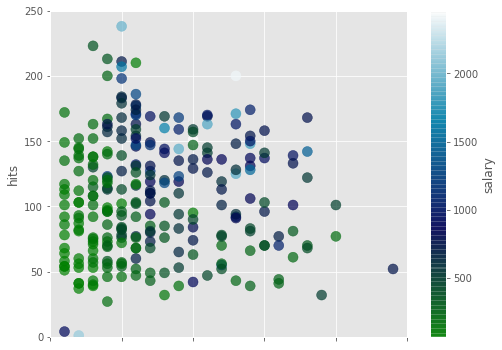

In [7]:
#Scatter plot of years versus hits colored by salary
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

hitters.plot(kind='scatter', x='years', y='hits',
             c='salary', cmap=plt.cm.get_cmap('ocean'), s = 100, alpha = .7,
             xlim=(0, 25), ylim=(0, 250), figsize=(8, 6));

In [5]:
# define features: exclude career statistics (which start with the letter "C") and the response (Salary)
feature_cols = [h for h in hitters.columns if h[0] != "c" and h != "salary"]
hitters[feature_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 13 columns):
atbat        263 non-null int64
hits         263 non-null int64
hmrun        263 non-null int64
runs         263 non-null int64
rbi          263 non-null int64
walks        263 non-null int64
years        263 non-null int64
league       263 non-null int64
division     263 non-null int64
putouts      263 non-null int64
assists      263 non-null int64
errors       263 non-null int64
newleague    263 non-null int64
dtypes: int64(13)
memory usage: 28.8 KB


In [6]:
# define X and y
X = hitters[feature_cols]
y = hitters.salary

### Predicting salary with a decision tree

Find the best max_depth for a decision tree using cross-validation:

In [7]:
# list of values to try for max_depth
max_depth_range = range(1, 21)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use 5-fold cross-validation with each value of max_depth
from sklearn.cross_validation import cross_val_score
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth = depth, random_state=234)
    MSE_scores = cross_val_score(treereg, X, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

/Users/darrenklee/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


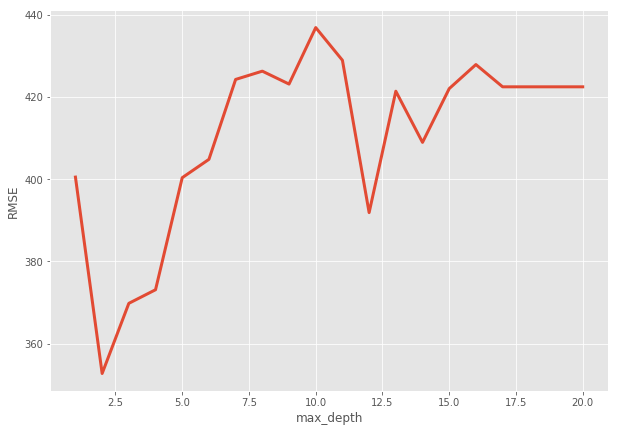

In [10]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.figure(figsize=(10, 7))
plt.plot(max_depth_range, RMSE_scores, linewidth = 3)
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.show()

In [14]:
# best at 2 depth level. Previously used Accuracy as score in the first Decision Tree Regression notebook.

Whats the best max_depth?

In [11]:
# show the best RMSE and the corresponding max_depth
sorted(zip(RMSE_scores, max_depth_range))[0]

(352.74208236397016, 2)

In [12]:
# max_depth=2 was best, so fit a tree using that parameter
treereg = DecisionTreeRegressor(max_depth=2, random_state = 234)
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=234, splitter='best')

In [13]:
# compute feature importances
pd.DataFrame({'feature':feature_cols, 
              'importance':treereg.feature_importances_}).sort_values('importance', 
                                                               ascending = False)

,feature,importance
6,years,0.488391
1,hits,0.375880
5,walks,0.135729
0,atbat,0.000000
2,hmrun,0.000000
3,runs,0.000000
4,rbi,0.000000
7,league,0.000000
8,division,0.000000
9,putouts,0.000000


### Predicting salary with a Random Forest

In [14]:
from sklearn.ensemble import RandomForestRegressor

#Intialize
rfreg = RandomForestRegressor()
#Show model details
rfreg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

#### Tuning n_estimators

Let's investigate the relationship between n_estimators and model performance

In [15]:
# list of values to try for n_estimators
estimator_range = range(10, 210, 10)

# list to store the average RMSE for each value of n_estimators
RMSE_scores = []

# use 5-fold cross-validation with each value of n_estimators. Will take a while.

for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=67)
    MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores))) 

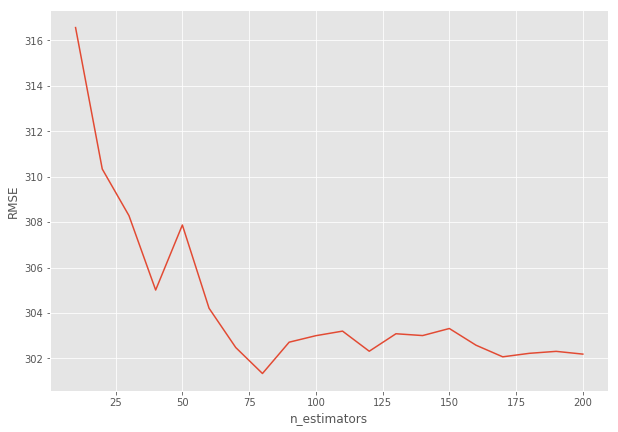

In [16]:
# plot n_estimators (x-axis) versus RMSE (y-axis)
plt.figure(figsize=(10, 7))
plt.plot(estimator_range, RMSE_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE');

In [17]:
RMSE_scores

[316.55491415461029,
 310.33223020014447,
 308.2816299989596,
 305.0090035532902,
 307.87099094768018,
 304.2075818314197,
 302.47964402272385,
 301.33754026430898,
 302.71534061174941,
 303.00122067309007,
 303.20195673308092,
 302.31757335081716,
 303.08618094108471,
 303.0067432322611,
 303.31683162982819,
 302.58177636267033,
 302.07147029373584,
 302.2256418648393,
 302.31180986991012,
 302.19043501804993]

In [18]:
#Best estimator
#Around 80! There's no point to add more estimators at this point

sorted(zip(RMSE_scores, estimator_range))[0]

(301.33754026430898, 80)

#### Tuning max_features

The other important tuning parameter is **max_features**, which is the number of features that should be considered at each split.

In [19]:
# list of values to try for max_features
feature_range = range(1, len(feature_cols)+1)

# list to store the average RMSE for each value of max_features
RMSE_scores = []

# use 5-fold cross-validation with each value of max_features (WARNING: SLOW!)
for feature in feature_range:
    rfreg = RandomForestRegressor(n_estimators=150, max_features=feature, random_state=237)
    MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores))) 

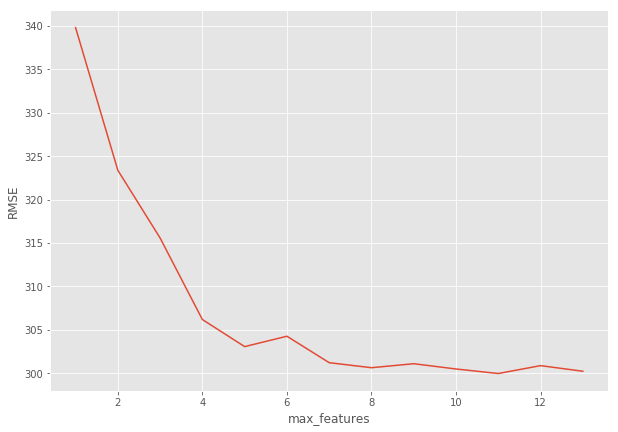

In [20]:
# plot max_features (x-axis) versus RMSE (y-axis)
plt.figure(figsize=(10, 7))
plt.plot(feature_range, RMSE_scores)
plt.xlabel('max_features')
plt.ylabel('RMSE');

In [21]:
# show the best RMSE and the corresponding max_features
#around 11 is the best!
sorted(zip(RMSE_scores, feature_range))[0]

(299.96042443372033, 11)

#### Fitting a Random Forest with the best parameters

In [22]:
# max_features=6 is best and n_estimators=150 is sufficiently large
rfreg = RandomForestRegressor(n_estimators=150, 
                              max_features=11,
                              oob_score=True,
                              random_state=1)
rfreg.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=11, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [23]:
# compute feature importances
pd.DataFrame({'feature':feature_cols,
              'importance':rfreg.feature_importances_}).sort_values('importance', ascending = False)

,feature,importance
6,years,0.256811
5,walks,0.146312
1,hits,0.140231
4,rbi,0.138130
0,atbat,0.087129
3,runs,0.062208
9,putouts,0.060810
2,hmrun,0.042608
11,errors,0.025555
10,assists,0.024671


In [24]:
# compute the out-of-bag R-squared score
rfreg.oob_score_

0.52267315613188225

### Reducing X to its most important features

In [43]:
# check the shape of X
X.shape

(263, 13)

In [47]:
important = ['years', 'walks', 'hits', 'rbi']
XX = X[important]

In [48]:
# set a threshold for which features to include. eliminate anything below 0.1, and keep top 4 features.
sorted(zip(rfreg.feature_importances_, feature_cols), reverse= True)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [38]:
#Use the mean threshold
rfreg.transform(X, threhold = "median").mean

AttributeError: 'RandomForestRegressor' object has no attribute 'transform'

In [49]:
# check the RMSE for a Random Forest that only includes important features
rfreg = RandomForestRegressor(n_estimators=150, max_features=3, random_state=1)
scores = cross_val_score(rfreg, XX, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

288.07010486542333

In [50]:
# check the RMSE for a Random Forest that only includes important features
rfreg = RandomForestRegressor(n_estimators=150, max_features=3, random_state=1)
scores = cross_val_score(rfreg, XX, y, cv=5, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

291.73689328864151

In [51]:
# check the RMSE for a Random Forest that includes ALL features ( for comparison )
rfreg = RandomForestRegressor(n_estimators=150, max_features=3, random_state=1)
scores = cross_val_score(rfreg, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

297.72727801297998

## Visualizing Decision Trees Classifier versus Random Forest Classifier

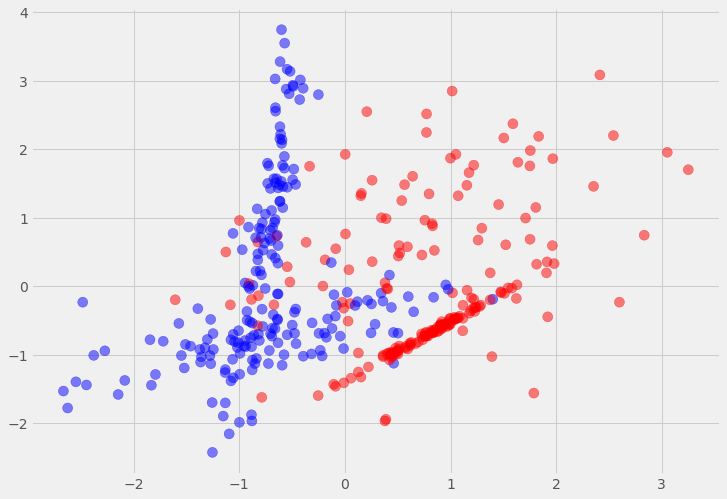

In [93]:
#Import model from scikit learn library
from sklearn.tree import DecisionTreeClassifier

#Fake data generation
from sklearn.datasets import make_classification

#Generate fake data that is 400 x 2.
data = make_classification(n_samples=400, n_features=2, n_informative=2, n_redundant=0, 
                    class_sep=.74, random_state = 28)

df = pd.DataFrame(data[0], columns=["feature1", "feature2"])
#Add target variable to df 
df["target"] = data[1]

#Call scatter plot of feature1 vs feature2 with color-encoded target variable
plt.style.use("fivethirtyeight")
plt.figure(figsize=(11, 8))
#Color encode target variable
colors = df.target.map({0:"b", 1:"r"})
plt.scatter(df.feature1, df.feature2, c = colors, s = 100, alpha=.5);

In [94]:
#Assign X and y
X = df.drop("target", axis = 1)
y = df.target

#Fit a Decision Tree model with no max_depth on the data.

dt = DecisionTreeClassifier()

dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [95]:
#Decision boundary function
def plot_decision_boundary(model, X, y):
    X_max = X.max(axis=0)
    X_min = X.min(axis=0)
    xticks = np.linspace(X_min[0], X_max[0], 100)
    yticks = np.linspace(X_min[1], X_max[1], 100)
    xx, yy = np.meshgrid(xticks, yticks)
    ZZ = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = ZZ >= 0.5
    Z = Z.reshape(xx.shape)
    plt.rcParams["figure.figsize"] = (10,7)
    fig, ax = plt.subplots()
    ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.2)
    ax.scatter(X[:,0], X[:,1], c=y, alpha=0.4, s = 50)

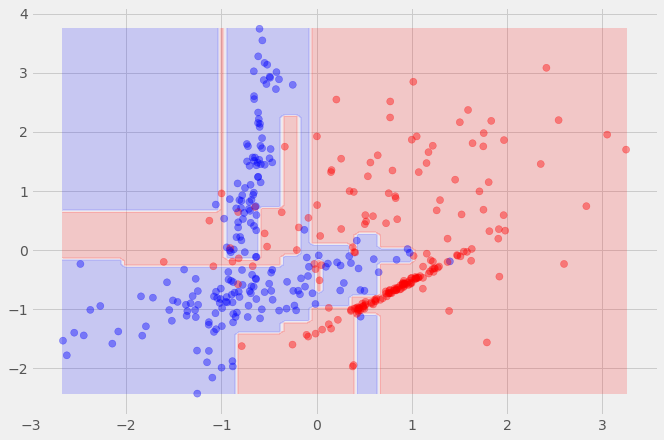

In [96]:
#Feed dt model, features and colors
plot_decision_boundary(dt, X.values, colors);

Fit RF model on data and visualize it

In [101]:
#Import RF classifier
from sklearn.ensemble import RandomForestClassifier
#Use estimators = 50
rf = RandomForestClassifier(n_estimators = 400)

#Fit model
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

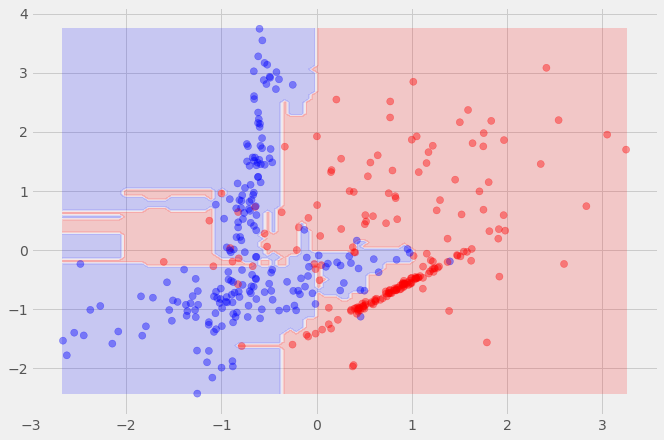

In [102]:
#Feed rf model, features and colors
plot_decision_boundary(rf, X.values, colors);

## Resources

- http://blog.datadive.net/interpreting-random-forests/
- http://blog.datadive.net/random-forest-interpretation-with-scikit-learn/
- https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.08-Random-Forests.ipynb
- https://aysent.github.io/2015/11/08/random-forest-leaf-visualization.html
- https://medium.com/rants-on-machine-learning/the-unreasonable-effectiveness-of-random-forests-f33c3ce28883
- https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/
- http://paolaelefante.com/2016/03/a-small-guide-to-random-forest-part-2/
- https://www.youtube.com/watch?v=QHOazyP-YlM
- https://www.youtube.com/watch?v=loNcrMjYh64
- https://machinelearningmastery.com/bagging-and-random-forest-ensemble-algorithms-for-machine-learning/
- https://machinelearningmastery.com/implement-bagging-scratch-python/
- https://towardsdatascience.com/enchanted-random-forest-b08d418cb411
- https://github.com/Miguel75An/Random-Forests-with-Iris-Data

## Classifying Employee Churn with Decision Trees and Random Forest

In class exercise in which we will apply both the Decision Trees and Random Forest models to the Employee Churn data. We'll compare and contrast the performances of both models using this dataset.

In [3]:
import pandas as pd
df = pd.read_csv('../data/HR_comma_sep.csv')

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
sales_dummies = pd.get_dummies(df.sales, prefix="sales", drop_first=True)
salary_dummies = pd.get_dummies(df.salary, prefix="salary", drop_first=True)

In [6]:
df.drop(["sales", "salary"], axis = 1, inplace= True)

In [7]:
df = pd.concat([df, salary_dummies, sales_dummies], axis = 1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
salary_low               14999 non-null uint8
salary_medium            14999 non-null uint8
sales_RandD              14999 non-null uint8
sales_accounting         14999 non-null uint8
sales_hr                 14999 non-null uint8
sales_management         14999 non-null uint8
sales_marketing          14999 non-null uint8
sales_product_mng        14999 non-null uint8
sales_sales              14999 non-null uint8
sales_support            14999 non-null uint8
sales_technical          14999 non-null uint8
dtypes: float

In [9]:
#Assign X and y

X = df.drop("left", axis = 1)
y = df.left

In [10]:
#null accuracy, an 80% accuracy is not that great...
y.value_counts(normalize=True)

0    0.761917
1    0.238083
Name: left, dtype: float64

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=8)
dt.fit(X, y)
dt.score(X, y)
#over fit?

0.98366557770518037

In [12]:
from sklearn.cross_validation import train_test_split

/Users/darrenklee/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,
                                                   random_state = 45)

In [14]:
dt = DecisionTreeClassifier(max_depth= 3,)
dt.fit(X_train, y_train)

dt.score(X_test, y_test)

0.95252525252525255

In [15]:
#testing score is 97%. We're feeling a little skeptical. Too good to be TRUE!!! Let's change depth to 3. originally 6
#let's use cross validation to see....

In [17]:
from sklearn.cross_validation import train_test_split, cross_val_score
cross_val_score(DecisionTreeClassifier(max_depth=7), X, y, cv = 5, scoring="accuracy").mean()

0.97699810962201217

In [122]:
#do we need random forest? it looks good enough. Now let's see the most important features...

In [18]:
sorted(zip(dt.feature_importances_, X_train.columns), reverse = True)

[(0.58912403292395132, 'satisfaction_level'),
 (0.15793192651792851, 'time_spend_company'),
 (0.14306720546346394, 'last_evaluation'),
 (0.10512689367270869, 'number_project'),
 (0.0047499414219474029, 'average_montly_hours'),
 (0.0, 'sales_technical'),
 (0.0, 'sales_support'),
 (0.0, 'sales_sales'),
 (0.0, 'sales_product_mng'),
 (0.0, 'sales_marketing'),
 (0.0, 'sales_management'),
 (0.0, 'sales_hr'),
 (0.0, 'sales_accounting'),
 (0.0, 'sales_RandD'),
 (0.0, 'salary_medium'),
 (0.0, 'salary_low'),
 (0.0, 'promotion_last_5years'),
 (0.0, 'Work_accident')]

In [19]:
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X, y)
dt.score(X, y)

0.98686579105273686

In [21]:
sorted(zip(dt.feature_importances_, X_train.columns), reverse = True)

[(0.51594620845136285, 'satisfaction_level'),
 (0.14695293588296413, 'time_spend_company'),
 (0.14516458237418986, 'last_evaluation'),
 (0.10748982944465894, 'number_project'),
 (0.077282944558428684, 'average_montly_hours'),
 (0.0025637980044877565, 'salary_low'),
 (0.0010544448485555052, 'Work_accident'),
 (0.00076360204262975937, 'sales_support'),
 (0.00072954749940034854, 'sales_RandD'),
 (0.00057753511842256028, 'sales_hr'),
 (0.00055425875015370767, 'sales_technical'),
 (0.00050081590414267332, 'salary_medium'),
 (0.00019165305200842357, 'sales_accounting'),
 (0.00013645551352489755, 'sales_sales'),
 (9.1388555070003199e-05, 'sales_marketing'),
 (0.0, 'sales_product_mng'),
 (0.0, 'sales_management'),
 (0.0, 'promotion_last_5years')]

In [9]:
#plot a cross validation score with depth...
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

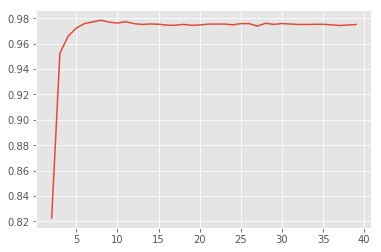

In [30]:
depths = range(2, 40)
cv_scores = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth= depth)
    score = cross_val_score(model, X, y, cv = 5, scoring = "accuracy").mean()
    cv_scores.append(score)    
plt.plot(depths, cv_scores)

In [130]:
#we're beating our null accuracy pretty good!

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 150, oob_score=True)

rf.fit(X, y)
rf.score(X, y)

In [37]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_low,salary_medium,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,0,1,0,0


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,
                                                   random_state = 45)

rf = RandomForestClassifier(n_estimators= 100)
rf.fit(X_train, y_train)

rf.score(X_test, y_test)

0.98888888888888893

In [39]:
rf = RandomForestClassifier(n_estimators=110)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,
                                                   random_state = 45)

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=110, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
print rf.score(X_train, y_train)
print rf.score(X_test, y_test)

0.999900487611
0.989090909091


In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
preds = rf.predict(X_test)

In [42]:
confusion_matrix(y_test, preds)

array([[3769,   14],
       [  40, 1127]])

In [48]:
#let's calculate the recall score, which is the True Positive rates etc..

from sklearn.metrics import recall_score, precision_score

In [49]:
recall_score(y_test, preds)

0.96572407883461864

In [50]:
#precision

precision_score(y_test, preds)

0.98773006134969321

In [51]:
#let's see the same thing for the Decision Tree model

dt = DecisionTreeClassifier(max_depth=8)
dt.fit(X_train, y_train)
preds2 = dt.predict(X_test)
recall_score(y_test, preds2)

0.92887746358183376

In [ ]:
#looks like Random Forest beats it by a little bit..

In [52]:
confusion_matrix(y_test, preds2)

array([[3756,   27],
       [  83, 1084]])

In [ ]:
#We have to calculate the False Positive and False Negative by hand

In [53]:
#ROC_AUC. Plot a Curve is better!
cross_val_score(DecisionTreeClassifier(max_depth=8), X, y, cv = 5, scoring="roc_auc").mean()


0.97783265649716

In [54]:
cross_val_score(RandomForestClassifier(max_depth=8), X, y, cv = 5, scoring="roc_auc").mean()


0.98643573145115204

In [56]:
from sklearn.ensemble import RandomForestRegressor

#Intialize for Random Forest.
rfreg = RandomForestRegressor()
#Show model details
rfreg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [57]:
# list of values to try for n_estimators
estimator_range = range(10, 210, 10)

# list to store the average RMSE for each value of n_estimators
RMSE_scores = []

# use 5-fold cross-validation with each value of n_estimators. Will take a while.

for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=67)
    MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

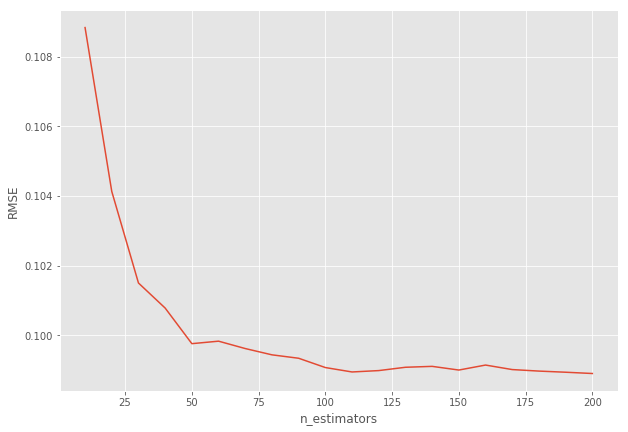

In [58]:
# plot n_estimators (x-axis) versus RMSE (y-axis)
plt.figure(figsize=(10, 7))
plt.plot(estimator_range, RMSE_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE');